# Иследования производительности для разных языков

Основновная цель проекта понять наскольно рентабельно писать расширения на низкоуровненых языках библиотеки для python

In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
json_files = [
    "../log/sieve_of_atkin_c_data.json",
    # "../log/sieve_of_atkin_python_data.json",
    "../log/sieve_of_atkin_numba_data.json",
]

In [26]:
performance_data = {}

for file in json_files:
    with open(file, "r") as f:
        data = json.load(f)
        for entry in data:
            func_name = entry["function"]
            if func_name not in performance_data:
                performance_data[func_name] = {
                    "len": [],
                    "execution_time": [],
                    "memory_used": [],
                    "peak_memory": []
                }
            performance_data[func_name]["len"].append(entry["len"])
            performance_data[func_name]["execution_time"].append(entry["execution_time"])
            performance_data[func_name]["memory_used"].append(entry["memory_used"])
            performance_data[func_name]["peak_memory"].append(entry["peak_memory"])

In [27]:
def remove_outliers(data, threshold=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]

In [28]:
metrics_labels = {
    "execution_time": "Execution Time (s)",
    "memory_used": "Memory Used (MB)",
    "peak_memory": "Peak Memory (MB)"
}

sns.set_theme(style="darkgrid")

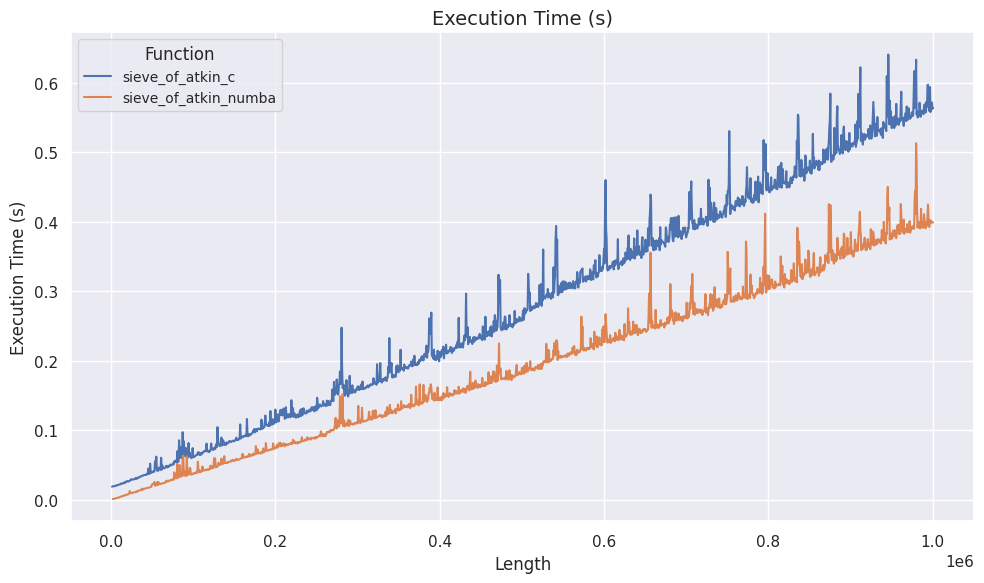

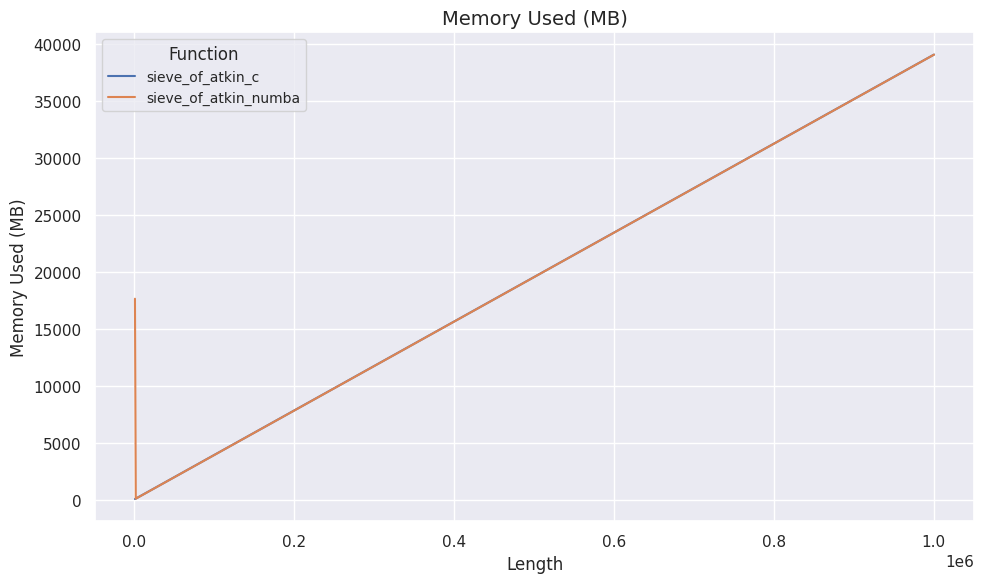

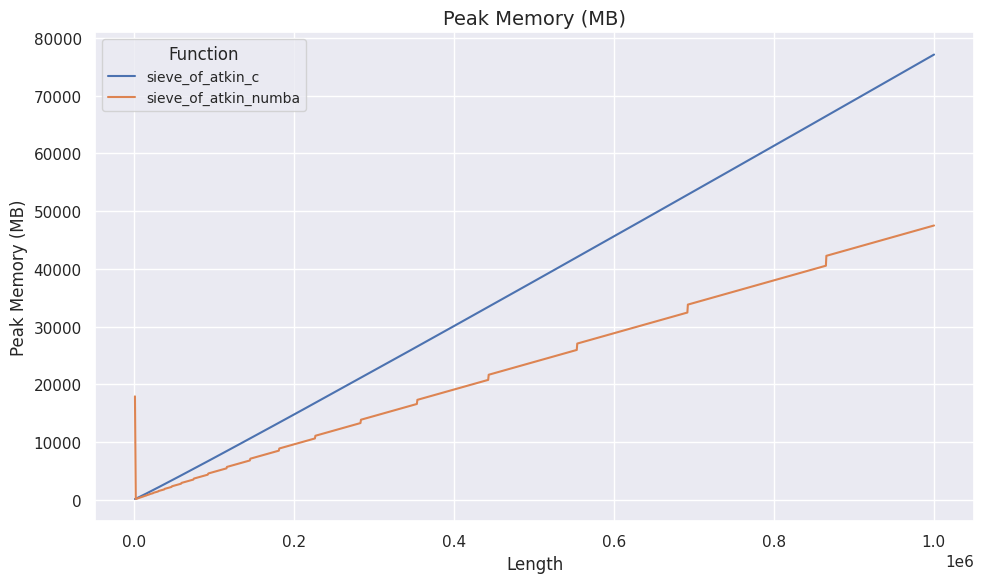

In [29]:
for metric in ["execution_time", "memory_used", "peak_memory"]:
    plt.figure(figsize=(10, 6))
    for func, metrics in performance_data.items():
        x = np.array(metrics["len"])
        y = np.array(metrics[metric])

        filtered_indices = np.isin(y, remove_outliers(y))
        x_filtered = x[filtered_indices]
        y_filtered = y[filtered_indices]

        sns.lineplot(x=x_filtered, y=y_filtered, label=func)

    plt.title(metrics_labels[metric], fontsize=14)
    plt.xlabel("Length", fontsize=12)
    plt.ylabel(metrics_labels[metric], fontsize=12)
    plt.legend(title="Function", fontsize=10)
    plt.tight_layout()
    plt.show()
